In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/ProUser/Documents/TSFN Datathon/Food Balance/rice_only (FP n FW)1.csv")
df = df[df['Area'] == 'Asia']
df

,Area,Item,Year,Unit,Losses,Production,Loss Percentage
55,Asia,Rice and products,Y2010,1000 tonnes,26957.0,627380.0,4.30
56,Asia,Rice and products,Y2011,1000 tonnes,28194.0,650396.0,4.33
57,Asia,Rice and products,Y2012,1000 tonnes,28474.0,657119.0,4.33
58,Asia,Rice and products,Y2013,1000 tonnes,29314.0,661741.0,4.43
59,Asia,Rice and products,Y2014,1000 tonnes,27127.0,657377.0,4.13
60,Asia,Rice and products,Y2015,1000 tonnes,27186.0,658899.0,4.13
61,Asia,Rice and products,Y2016,1000 tonnes,26802.0,658810.0,4.07
62,Asia,Rice and products,Y2017,1000 tonnes,26742.0,671896.0,3.98
63,Asia,Rice and products,Y2018,1000 tonnes,27099.0,683792.0,3.96
64,Asia,Rice and products,Y2019,1000 tonnes,26595.0,670490.0,3.97


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
df['Year'] = df['Year'].str.replace('Y', '').astype(int)

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

historical_years = range(2010, 2021)
future_years = range(2021, 2031)

forecast_data_all = pd.DataFrame()

for area, data_group in df.groupby('Area'):
    historical_data = data_group.loc[data_group['Year'].isin(historical_years)]
    model_historical = ARIMA(historical_data['Losses'].values, order=(1, 1, 1))
    model_fit_historical = model_historical.fit()

    historical_forecast_values = model_fit_historical.predict(start=0, end=len(historical_years) - 1, typ='levels')

    historical_forecast_data_area = pd.DataFrame({'Year': historical_years, 'Losses': historical_forecast_values, 'Area': area})

    forecast_data_all = pd.concat([forecast_data_all, historical_forecast_data_area], ignore_index=True)

    model_future = ARIMA(data_group['Losses'].values, order=(1, 1, 1))
    model_fit_future = model_future.fit()

    future_forecast_values = model_fit_future.forecast(steps=len(future_years))

    future_forecast_data_area = pd.DataFrame({'Year': future_years, 'Losses': future_forecast_values, 'Area': area})

    forecast_data_all = pd.concat([forecast_data_all, future_forecast_data_area], ignore_index=True)


c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:534: RuntimeWarning: invalid value encountered in scalar divide
  return -self.loglike(params, *args) / nobs
c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyw

In [ ]:
forecast_data_all['Losses'] = forecast_data_all['Losses'].round(2)
forecast_data_all.to_csv("forecasted_losses.csv", index=False)

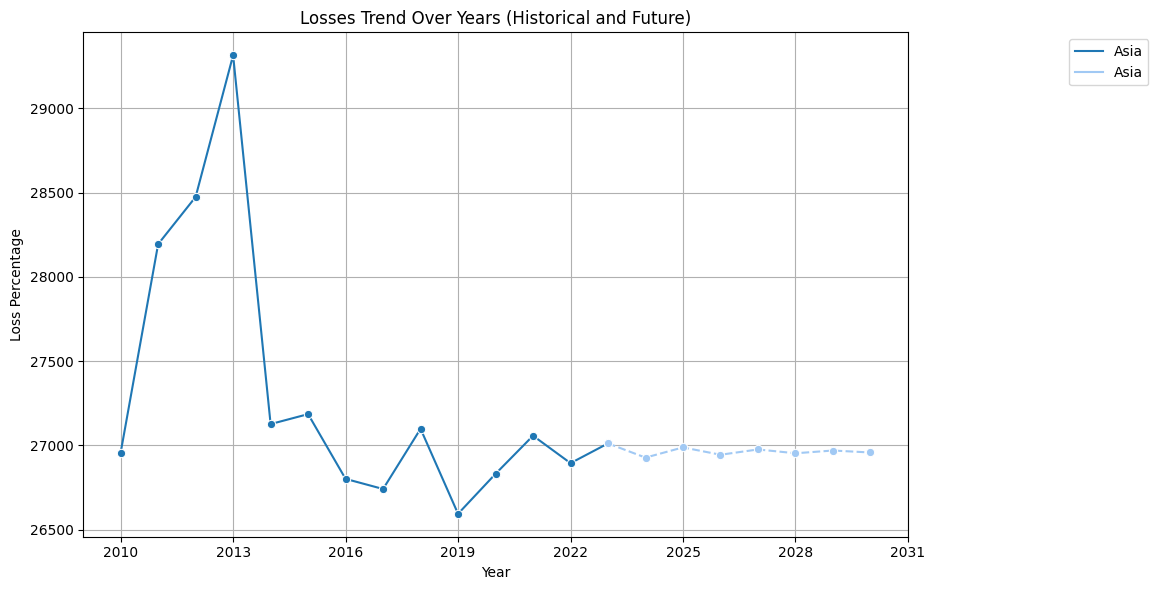

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("C:/Users/ProUser/Documents/TSFN Datathon/Food Balance/forecasted_losses.csv")
forecast_data_all = data[(data['Area'] == 'Asia') & (data['Losses'] != 0)]
historical_years = range(2010, 2024)
future_years = range(2023, 2031)

historical_data = forecast_data_all[forecast_data_all['Year'].isin(historical_years)]
future_data = forecast_data_all[forecast_data_all['Year'].isin(future_years)]

historical_data.loc[:, 'Year'] = historical_data['Year'].round().astype(int)
future_data.loc[:, 'Year'] = future_data['Year'].round().astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Losses', hue='Area', data=historical_data, palette='tab10', marker='o', linestyle='-')

sns.lineplot(x='Year', y='Losses', hue='Area', data=future_data, palette='pastel', marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Loss Percentage')
plt.title('Losses Trend Over Years (Historical and Future)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.grid(True)
plt.show()

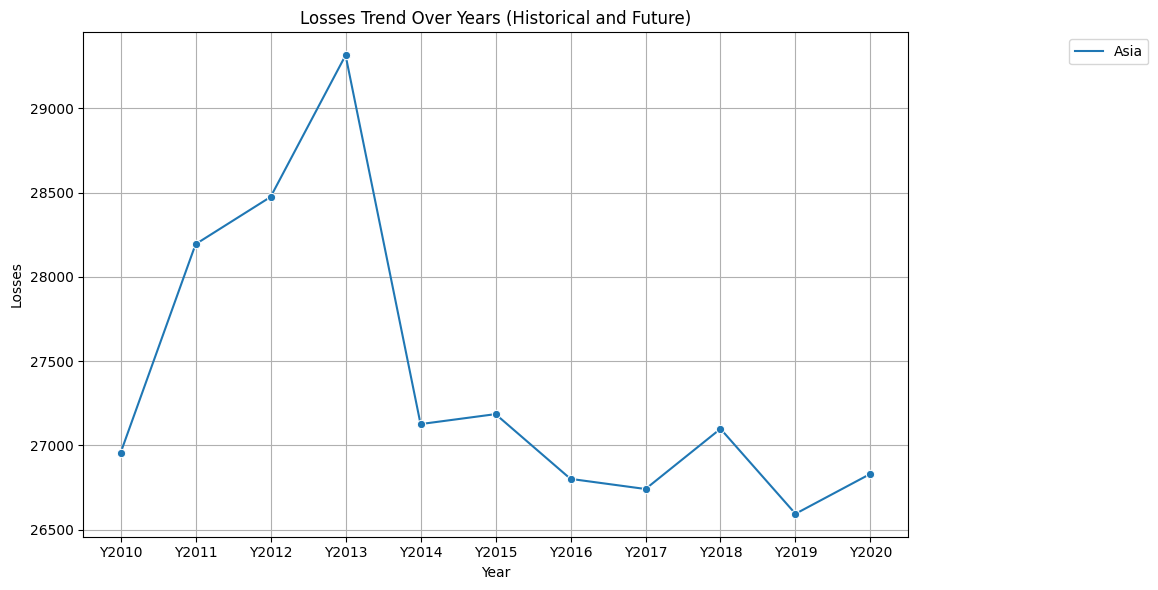

In [ ]:
historical = pd.read_csv("C:/Users/ProUser/Documents/TSFN Datathon/Food Balance/rice_only (FP n FW)1.csv")
historical = historical[historical['Area'] == 'Asia']

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Losses', hue='Area', data=historical, palette='tab10', marker='o', linestyle='-')


plt.xlabel('Year')
plt.ylabel('Losses')
plt.title('Losses Trend Over Years (Historical and Future)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.grid(True)
plt.show()